In [43]:
import networkx as nx
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
import scipy.sparse as sparse
import freeman as fm



C:\Users\hugoc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\hugoc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\hugoc\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



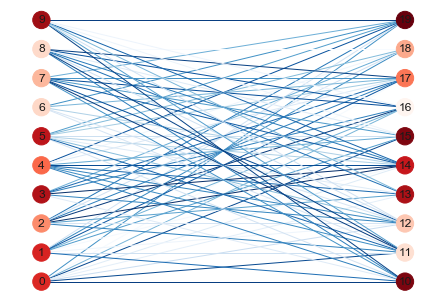

In [44]:
## Exemplo de Two-Mode 

a_matrix = sparse.rand(10, 10, format='coo', density=0.8)

G = bipartite.from_biadjacency_matrix(a_matrix, create_using=None, 
                                         edge_attribute='weight')
X, Y = bipartite.sets(G)
pos = dict()
pos.update((n, (0, i*10)) for i, n in enumerate(X))
pos.update((n, (0.5, i*10)) for i, n in enumerate(Y))
num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
nx.draw(G, pos=pos, with_labels=True,
        edge_color=np.random.random(num_edges), 
        edge_cmap=plt.get_cmap('Blues'), 
        node_color=np.random.random(num_nodes),
        cmap=plt.get_cmap('Reds'))

In [45]:
allGenres = []
allMovies = []
df = pd.read_csv("C:/Users/hugoc/Desktop/Insper/redess/ComedyisDead/dataim.tsv" , sep='\t')
print(len(df.columns))
df.genres = df.genres.astype(str)
counter = 0
for i in df.index:
	if (counter < 20):
		movie = df.iloc[i]
		genreList = movie["genres"].split(",")
		for e in genreList:
			if e not in allGenres:
				allGenres.append(e)
		if "Comedy" in genreList:
			print(movie["originalTitle"])
			allMovies.append({"movie":movie["originalTitle"],"genres":genreList})
			counter+=1
print(allGenres)
print(allMovies)

C:\Users\hugoc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



9
Pauvre Pierrot
Blacksmith Scene
L'arroseur arrosé
The Clown Barber
La voltige
L'arroseur
Bataille de neige
A Hard Wash
The Soldier's Courtship
Les tribulations d'un concierge
Une nuit terrible
L'arroseur arrosé
Au réfectoire
L'auberge ensorcelée
Les cambrioleurs
Chez le magnétiseur
En classe
Le cocher de fiacre endormi
Dans les coulisses
L'hôtel empoisonné
['Documentary', 'Short', 'Animation', 'Comedy', 'Romance', 'Sport', 'Action', 'News', 'Drama', 'Fantasy', 'Horror', 'Biography', 'Music']
[{'movie': 'Pauvre Pierrot', 'genres': ['Animation', 'Comedy', 'Romance']}, {'movie': 'Blacksmith Scene', 'genres': ['Comedy', 'Short']}, {'movie': "L'arroseur arrosé", 'genres': ['Comedy', 'Short']}, {'movie': 'The Clown Barber', 'genres': ['Comedy', 'Short']}, {'movie': 'La voltige', 'genres': ['Comedy', 'Documentary', 'Short']}, {'movie': "L'arroseur", 'genres': ['Comedy', 'Short']}, {'movie': 'Bataille de neige', 'genres': ['Action', 'Comedy', 'Documentary']}, {'movie': 'A Hard Wash', 'genres

In [46]:
import pandas as pd 
dic = {}

df = pd.read_json(r"C:/Users/hugoc/Desktop/Insper/ComedyisDead/test.json")
df = df[df.box_office != "N/A"].dropna(subset=['box_office'])
df["box_office"] = df["box_office"].replace(',', '', regex=True).str[1:].astype({"box_office": int})
df = df.sort_values(by=['box_office'], ascending = False)


for i, j in zip(df["actors"], df["genre"]):
    listator = i.split(', ')
    listagen = j.split(', ')
    for a in listator:
        if a not in dic:
            dic[a] = {}
        for g in listagen:
            if g not in dic[a]:
                dic[a][g] = 1
            else:
                dic[a][g] += 1

dic            
                    

{'Alan Howard': {'Adventure': 1, 'Drama': 1, 'Fantasy': 1},
 'Alfre Woodard': {'Adventure': 1, 'Animation': 1, 'Family': 1, 'Thriller': 1},
 'Alfred Molina': {'Biography': 1, 'Drama': 1, 'Romance': 1},
 'Allen Soule': {'Comedy': 1, 'Drama': 1},
 'Angelina Jolie': {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Thriller': 1},
 'Angelina Torres': {'Drama': 1, 'Romance': 1, 'Western': 1},
 'Anna Bolt': {'Action': 1, 'Horror': 1, 'Sci-Fi': 1},
 'Anne Archer': {'Action': 1, 'Adventure': 1, 'Crime': 1, 'Thriller': 1},
 'Antonio Banderas': {'Biography': 1, 'Drama': 1, 'Romance': 1},
 'Bill Murray': {'Action': 1,
  'Adventure': 1,
  'Comedy': 1,
  'Crime': 1,
  'Thriller': 1},
 'Breckin Meyer': {'Comedy': 1, 'Fantasy': 1, 'Romance': 1},
 'Cameron Diaz': {'Action': 1,
  'Adventure': 2,
  'Animation': 1,
  'Comedy': 2,
  'Crime': 1,
  'Family': 1,
  'Fantasy': 1,
  'Thriller': 1},
 'Carol Alexander': {'Comedy': 1, 'Drama': 1, 'Music': 1, 'Romance': 1},
 'Cate Blanchett': {'Drama': 1},
 'Catherine Z

In [58]:
Movies_names = []
for i in allMovies:
    Movies_names.append(i["movie"])

B = fm.Graph(nx.empty_graph())

B.add_nodes_from(Movies_names,bipartite = 0)
B.add_nodes_from(allGenres,bipartite = 1)
B.set_all_nodes('size', 5)
B.set_all_nodes('labpos', 'hover')
for i in allMovies:
    for e in i["genres"]:
        B.add_edge(i["movie"],e,color=(255,0,255),weight=6)
        
num_edges = B.number_of_edges()
num_nodes = B.number_of_nodes()

## Referencia do codigo abaixo do exercicio 3 das aulas. Por algum motivo o bipartite nao funcionou
B.move('bipartite', [n for n in B.nodes if B.nodes[n]['bipartite'] == 0])
        

In [59]:
B.draw()

In [60]:
B.corplot_twomode([n for n in B.nodes if B.nodes[n]['bipartite'] == 0])

AttributeError: 'Graph' object has no attribute 'corplot_twomode'